# Numerics about the ex-ante constrained problem

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def affine_strategy(a,b) :
    return (lambda t : t*a+b,lambda t : (t-b)/a,a)

In [86]:
def run_test(strategy, details=False, niter=10**5) :
    external_payments = 0
    internal_payments = 0
    nb_success = 0
    internal_utility = 0
    external_utility = 0
    
    acc = 0

    for i in range(niter) :
        v = np.random.rand(n)
        y = np.random.rand(1)[0]
        v_2, v_1 = np.sort(v)[-2:]
        
        b = strategy[0](v_1)
        
        if(b>y) :
            internal_payments += max(v_2,strategy[1](y))
            external_payments += b
            nb_success += 1
            internal_utility += v_1-max(v_2,strategy[1](y))
            external_utility += v_1-b
            
            acc += max(v_2,strategy[1](y)) - ( v_1*strategy[0](v_1) -  strategy[2]*(v_1**2-v_2**2)/2 )

    if(details) :
        print("average internal payment :",internal_payments/niter)
        print("average external payment :",external_payments/niter)
        print("delta int-ext :",internal_payments/niter-external_payments/niter)

        print("ratio of the number of auctions won by the ring :",nb_success/niter)
        print("average internal utility :",internal_utility/niter)
        print("average external utility :",external_utility/niter)
        
        print("\n acc : ", acc/niter)
        
    return [internal_payments/niter,external_payments/niter, internal_utility/niter]

## Tests

In [46]:
n = 10

#### Truthful external bid : $\beta : v_1 \mapsto v_1$

In [87]:
run_test(affine_strategy(1,0),details=True)

average internal payment : 0.8657953935549929
average external payment : 0.9090790869660403
delta int-ext : -0.04328369341104743
ratio of the number of auctions won by the ring : 0.95252
average internal utility : 0.04328369341103475
average external utility : 0.0

 acc :  0.0377455809408923


[0.8657953935549929, 0.9090790869660403, 0.04328369341103475]

#### Best response : $\beta : v_1 \mapsto v_1/2$

In [88]:
run_test(affine_strategy(0.5,0),details=True)

average internal payment : 0.43110875256661974
average external payment : 0.2262985802610477
delta int-ext : 0.20481017230557202
ratio of the number of auctions won by the ring : 0.47417
average internal utility : 0.021488407955468736
average external utility : 0.2262985802610477

 acc :  0.22495077476179914


[0.43110875256661974, 0.2262985802610477, 0.021488407955468736]

#### Custom strategy $v_1 \mapsto \frac{n}{n+1}v_1$
follows from the ex-ante problem $m=m^e$ only, in the uniform case

In [89]:
run_test(affine_strategy(n/(n+1),0),details=True,niter=10**6)

average internal payment : 0.8243879013858207
average external payment : 0.8243913744539517
delta int-ext : -3.4730681309769196e-06
ratio of the number of auctions won by the ring : 0.906866
average internal utility : 0.041223041790829605
average external utility : 0.041219568722695055

 acc :  0.07340253219805225


[0.8243879013858207, 0.8243913744539517, 0.041223041790829605]

#### Custom strategy $v_1 \mapsto \frac{1}{3}(2+\frac{n-1}{n+1})v_1$

In [78]:
run_test(affine_strategy((2+(n-1)/(n+1))/3,0),details=True,niter=10**6)

average internal payment : 0.687120747407744
average external payment : 0.7125821701252815
delta int-ext : -0.025461422717537485
ratio of the number of auctions won by the ring : 0.839935
average internal utility : 0.07636014915506961
average external utility : 0.05089872643752033


[0.687120747407744, 0.7125821701252815, 0.07636014915506961]

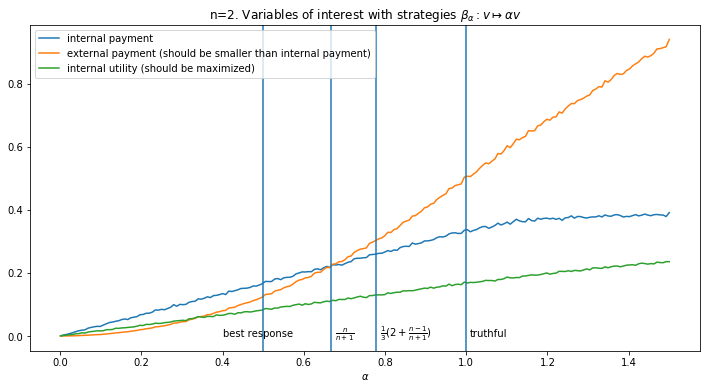

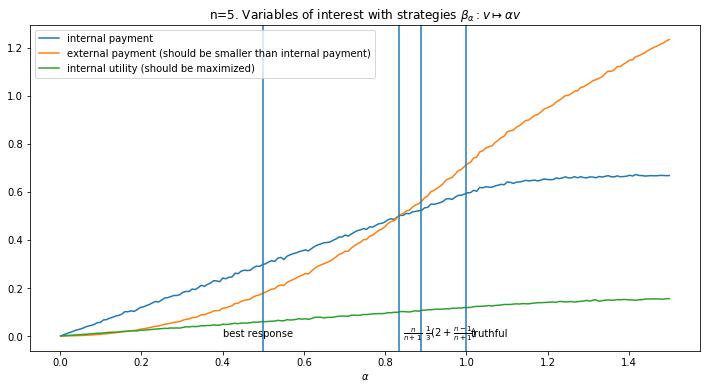

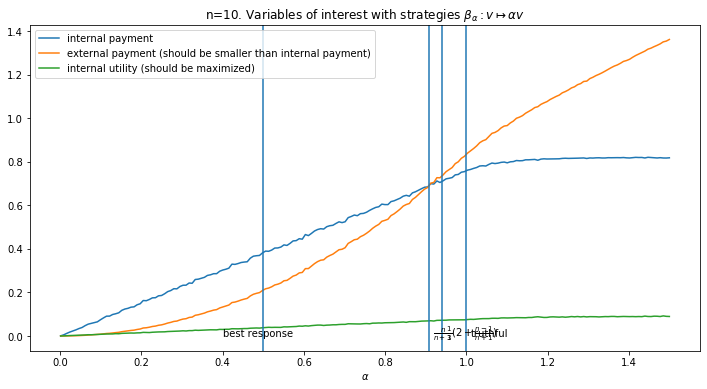

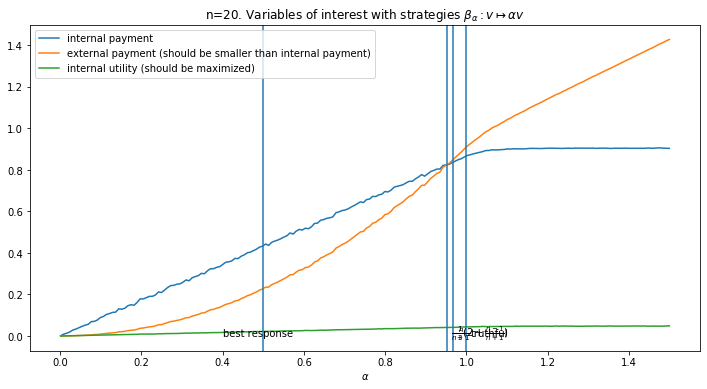

In [82]:
for n in [2,5,10,20] :
    pl = [[],[],[]]

    plt.figure(figsize=(12,6))
    grid = np.linspace(0.001,1.5,200)
    for a in grid :
        out = run_test(affine_strategy(a,0),niter=10**4)
        pl[0].append(out[0])
        pl[1].append(out[1])
        pl[2].append(out[2])
    plt.plot(grid,pl[0],label='internal payment')
    plt.plot(grid,pl[1],label='external payment (should be smaller than internal payment)')
    plt.plot(grid,pl[2],label='internal utility (should be maximized)')
    
    plt.legend(loc="upper left")
    plt.axvline(1)
    plt.text(1+0.01,0,'truthful')
    
    plt.axvline(0.5)
    plt.text(0.4,0,'best response')
    
    plt.axvline(n/(n+1))
    plt.text(n/(n+1)+0.01,0,r'$\frac{n}{n+1}$')
    
    plt.axvline((2+(n-1)/(n+1))/3)
    plt.text((2+(n-1)/(n+1))/3+0.01,0,r'$\frac{1}{3}(2+\frac{n-1}{n+1})$')
    
    plt.xlabel(r'$\alpha$')
    plt.savefig("linear_strategy_uniform_case_n="+str(n))
    plt.title(r'n='+str(n)+r'. Variables of interest with strategies $\beta_\alpha : v \mapsto \alpha v$')
    plt.show()

# Poubelle

In [14]:
poly = [(n+3)*(n+2)**2,(2*n+3)*n*(n+1)-2*(n+2)**2,-n*(n+1)**2]
l1,l2 = np.roots(poly)

print("lambda1",l1)
print("lambda2",l2)


def beta(l) :
    return affine_strategy(1/(2*(1-l)),-l/(2*(1-l)))

lambda1 -0.7911441543944595
lambda2 0.4044774877277928


#### Constrainted strategy $(\lambda=\lambda_1)$

In [20]:
run_test(beta(l1),details=True)

average internal payment : 0.23635932892375983
average external payment : 0.18711907217062576
delta int-ext : 0.049240256753134065
ratio of the number of auctions won by the ring : 0.4288
average internal utility : 0.09471252226015887
average external utility : 0.1439527790132926


[0.23635932892375983, 0.18711907217062576]

#### Constrainted strategy $(\lambda=\lambda_2)$

In [21]:
run_test(beta(l2),details=True)

average internal payment : 0.20929451163652893
average external payment : 0.11245280402671354
delta int-ext : 0.09684170760981539
ratio of the number of auctions won by the ring : 0.3004
average internal utility : 0.046146878408985126
average external utility : 0.14298858601880093


[0.20929451163652893, 0.11245280402671354]

In [23]:
alpha = 2/(3*(n+1))
run_test(affine_strategy(alpha,0),details=True)

average internal payment : 0.07336654067120946
average external payment : 0.016385442900287005
delta int-ext : 0.05698109777092245
ratio of the number of auctions won by the ring : 0.1246
average internal utility : 0.024946116730512665
average external utility : 0.081927214501435


[0.07336654067120946, 0.016385442900287005]